Correlación

La vicepresidenta de Crecimiento de DataSciencester tiene una teoría
según la cual la cantidad de tiempo que la gente se queda en el sitio está
relacionada con el número de amigos que tienen en él (ella no es
vicepresidenta porque sí), y quiere verificar esta afirmación.


In [ ]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

from collections import Counter
import matplotlib.pyplot as plt
import math

In [ ]:
from scratch.linear_algebra import sum_of_squares
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))


Tras escarbar en los registros de tráfico, obtenemos una lista llamada
daily_minutes, que muestra los minutos al día que se pasa cada usuario en
DataSciencester, y la hemos ordenado de forma que sus elementos se
correspondan con los elementos de nuestra lista anterior num_friends. Nos
gustaría investigar la relación entre estas dos métricas.

Primero, veremos la covarianza, la análoga emparejada de la varianza.
Mientras la varianza mide la desviación de la media de una sola variable, la
covarianza mide la variación de dos variables en tándem con respecto a sus
medias:

In [ ]:

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

from scratch.linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60


Recordemos que dot suma los productos de los pares de elementos correspondientes. Cuando los elementos correspondientes de x e y están ambos por encima o por debajo de sus medias, un número positivo entra en la suma.

Cuando uno está por encima de la media y el otro por debajo, es un número negativo lo que entra en la suma. De acuerdo con esto, una
covarianza positiva “grande” significa que x tiende a ser grande cuando y es grande y pequeño cuando y es pequeño. Una covarianza negativa “grande” significa lo contrario: que x tiende a ser pequeño cuando y es grande y viceversa. Una covarianza cercana a cero significa que no existe tal relación.

No obstante, este número puede ser difícil de interpretar por varias razones:

- ■ Sus unidades son el producto de las unidades de las entradas (por ejemplo, amigos-minutos-al-día), lo que puede ser difícil de entender (¿qué es un “amigo-minuto-al-día”?).
- ■ Si cada usuario tuviera el doble de amigos (pero el mismo número de minutos), la covarianza sería el doble de grande. Pero, en cierto
sentido, las variables estarían igual de interrelacionadas. Dicho de otro modo, es difícil decir lo que cuenta como una covarianza “grande”.
Por esta razón, es más común mirar la correlación, que divide las desviaciones estándares de ambas variables:

In [ ]:

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25


La correlation no tiene unidad y siempre está entre -1 (anticorrelación
perfecta) y 1 (correlación perfecta). Un número como 0,25 representa una
correlación positiva relativamente débil. Sin embargo, una cosa que
olvidamos hacer fue examinar nuestros datos. Veamos la figura 5.2.


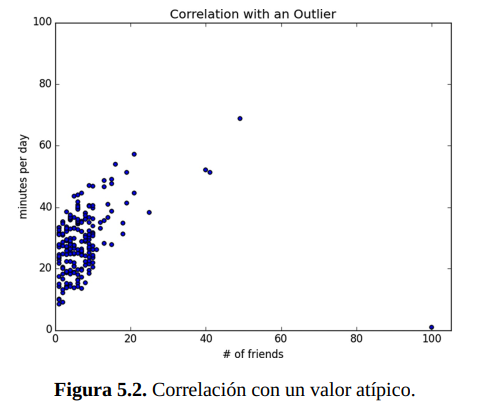


La persona que tiene 100 amigos (y que pasa únicamente 1 minuto al día
en el sitio) es un enorme valor atípico, y la correlación puede ser muy
sensible a estos valores. ¿Qué ocurre si le ignoramos?

In [ ]:

outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58


Sin el valor atípico, hay una correlación mucho más fuerte (véase la figura 5.3).

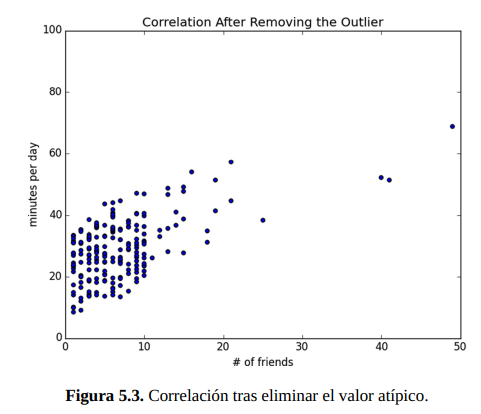

Seguimos investigando para descubrir que el valor atípico era realmente
una cuenta de prueba interna que nadie se había preocupado nunca de
eliminar. Así que su exclusión está totalmente justificada.